### Présentation des résultats

Dans le cadre de notre analyse exploratoire des données liées au basketball, nous disposions de plusieurs fichiers apportant des informations complémentaires : les matchs, les joueurs, leurs performances à la Draft, etc.

Dans cette section, nous présentons les éléments les plus pertinents que nous avons pu extraire de ces jeux de données. Les résultats exposés répondent à des questions spécifiques que nous avons choisies d’approfondir. Parmis ces intérogation, deux nous étaient imposé dans le cadre ce projet.

#### Chargement des package nécessaire au traitement

In [1]:
from application.shared import data  # pour la récupération des données (données harmonisées)
import pandas as pd  # Pour la manipulation des tables
from answers_class import Reponse  # Notre classe méthode avec les méthodes de classes qui apporte des réponses au questions
from utils.export_files import ExportFiles # pour exporter les données
import matplotlib.pyplot as plt
import copy
from utils.chargement_data import replace_old_team_name
import numpy as np
import matplotlib

In [2]:
# instanciation de la classe
exportfiles = ExportFiles()

# initialisation des repertoires d'exportation
tables_dir = '../Exportations/tables'
figures_dir = '../Exportations/images'

#### Création de l'instance de classe

Ce sont les méthodes de classe de la classe `Reponse` qui va nous permettre d'aporter une réponse à chacune de nos intérogations. Ci-desssous on retrouve quelques informations sur nos tables. 

In [3]:
reponses = Reponse(data=data)

> Quelques statistiques descriptives

In [4]:
# L'ensemble des tables sur lesquelles porte nos analyses
print(list(reponses.data.keys()))
print("\n")

# Extrait de la table common_player_info
statut = data["common_player_info"].groupby("rosterstatus")["person_id"].count()
type_draf = data["draft_history"].groupby("draft_type")["draft_type"].count()
nb_equipe = data["team_details"]["team_id"].count()
nb_joueur = data["common_player_info"]["person_id"].count()

saison_max = data["game_summary"]["season"].max()
saison_min = data["game_summary"]["season"].min()

# Création d'une table de synthèse
synthese = pd.DataFrame(
    {"Variable": ["Statut joueur"]*2 + ["Type de draft"]*2 + ["Effectif"]*2 + ["Saison"]*2,
     "Modalité": list(statut.index) + list(type_draf.index) + ["Equipe", "Joueur"] + ["Ancienne", "Recente"],
     "Statistique": list(statut.values) + list(type_draf.values) + [nb_equipe, nb_joueur] + [saison_min, saison_max]}
)
synthese


['common_player_info', 'draft_combine_stats', 'draft_history', 'game', 'game_info', 'game_summary', 'inactive_players', 'line_score', 'officials', 'other_stats', 'player', 'team', 'team_details', 'team_history', 'team_info_common']




,Variable,Modalité,Statistique
0,Statut joueur,Active,431
1,Statut joueur,Inactive,3740
2,Type de draft,Draft,7971
3,Type de draft,Territorial,19
4,Effectif,Equipe,25
5,Effectif,Joueur,4171
6,Saison,Ancienne,1946
7,Saison,Recente,2022


Parmi l’ensemble des fichiers disponibles, l’un d’eux recense tous les matchs disputés durant la période étudiée, de la saison régulière aux playoffs. Ce jeu de données couvre les rencontres qui ont eu lieu **de la saison 1946-1947 à la saison 2022-2023**.

In [5]:
# exporter synthèses ?
exportfiles.export_to_csv_format(
    synthese,
    f'{tables_dir}/RQ_synthèse.csv'
)

True

#### I. Questions obligatoires

##### 1. Les équipes NBA qui ont remporté au moins 3 fois le titre

Pour répondre à cette question, nous avions créer une méthode de classe qui nous renvoie les équipes ayant remporté au moins `N` fois le titre NBA. Ainsi, cela offre la liberté à l'utilisateur de définir sa propre borne inférieure. Cette méthode offre également la possibilité de définir une période.

In [6]:
resultat = reponses.equipe_remporte_au_moins_N_fois_le_titre(nb_victoire_min=3)
resultat

,Equipe,Nombre de titre NBA
0,Boston Celtics,17
1,Los Angeles Lakers,17
2,Golden State Warriors,7
3,Chicago Bulls,6
4,Philadelphia 76ers,6
5,San Antonio Spurs,5
6,Miami Heat,3
7,Detroit Pistons,3
8,Houston Rockets,3


In [7]:
# Exportez resultats ?
exportfiles.export_to_csv_format(
    resultat,
    f'{tables_dir}/RQ_results_q1.csv'
)

True

##### 2. Classement des conférences Ouest et Est à la fin de la saison régulière 2022-2023

Pour connaître les premières équipes du classement dans chaque conférence, on s'intéresse d'abord à leur nombre de victoires sur la période considérée. En cas d'égalité entre deux équipes, elles sont départagées selon leur nombre de points.
De même, nous avons implémenté une méthode de classe qui nous permet de fournir cette information. ce traitement peut être ajusté selon la saison (`season`). De plus, il est toutefois possible d'avoir le classement des équipes de chaque conférence à un instant `t` donné de la saison défini par le paramètre `end` de la méthode de la classe. 

In [8]:
resultat_conf = reponses.classement_conferences(season='2022-2023')
print(resultat_conf['Conférence Est']) ; print(resultat_conf['Conférence Ouest'])

                 Équipe  Victoires  Points
0       Milwaukee Bucks         58  9589.0
1        Boston Celtics         57  9671.0
2    Philadelphia 76ers         54  9448.0
3   Cleveland Cavaliers         51  9205.0
4       New York Knicks         47  9514.0
5         Brooklyn Nets         45  9295.0
6            Miami Heat         44  8977.0
7         Atlanta Hawks         41  9711.0
8       Toronto Raptors         41  9254.0
9         Chicago Bulls         40  9276.0
10       Indiana Pacers         35  9535.0
11   Washington Wizards         35  9279.0
12        Orlando Magic         34  9136.0
13    Charlotte Hornets         27  9098.0
14      Detroit Pistons         17  9045.0
                    Équipe  Victoires  Points
0           Denver Nuggets         53  9495.0
1        Memphis Grizzlies         51  9587.0
2         Sacramento Kings         48  9898.0
3             Phoenix Suns         45  9319.0
4    Golden State Warriors         44  9753.0
5              LA Clippers         4

In [9]:
# Exportation
exportfiles.export_to_csv_format(
    resultat_conf["Conférence Est"],
    f'{tables_dir}/RQ_results_q2_conf_Est.csv'
)

exportfiles.export_to_csv_format(
    resultat_conf["Conférence Ouest"],
    f'{tables_dir}/RQ_results_q2_conf_Ouest.csv'
)

True

> Classement à la date du `1er janvier 2023`

In [10]:
# La date de début de la saison 2022-2023 est
resultat = reponses.classement_conferences(season='2022-2023', end='2023-01-01')
resultat

{'Conférence Est':                  Équipe  Victoires  Points
 0        Boston Celtics         26  4389.0
 1         Brooklyn Nets         24  4122.0
 2   Cleveland Cavaliers         23  4116.0
 3       Milwaukee Bucks         23  4048.0
 4    Philadelphia 76ers         21  3917.0
 5        Indiana Pacers         20  4269.0
 6       New York Knicks         19  4235.0
 7            Miami Heat         19  4033.0
 8    Washington Wizards         17  4260.0
 9         Atlanta Hawks         17  4123.0
 10        Chicago Bulls         16  4095.0
 11      Toronto Raptors         16  4007.0
 12        Orlando Magic         13  4061.0
 13      Detroit Pistons         10  4357.0
 14    Charlotte Hornets         10  4118.0,
 'Conférence Ouest':                     Équipe  Victoires  Points
 0           Denver Nuggets         24  4197.0
 1     New Orleans Pelicans         23  4234.0
 2        Memphis Grizzlies         23  4156.0
 3              LA Clippers         21  4170.0
 4         Dallas Mave

### II. Autres axes d'analyse

##### 3. Quelques statistique sur la taille et le poids des joueurs selon leur poste

Grâce à cette méthode, nous parvenons à réaliser une analyse descriptive sur la taille et le poids des joueurs. Les donnéesn étant initialement en anglais, nous avions la taille en `inches` et le poids en `livres`. C'est donc suite à leur convertion que nous obtenons les statistisques suivantes. La méthode de classe permet de réaliser 4 statistique : la moyenne (`Mean`), la médiane (`Meadian`), le maximum (`Max`), le minimum (`Min`).

In [11]:
stat_players = reponses.stat_sur_taille_et_poids_par_poste(statistique="Median")
stat_players

,position,Taille cm,Poids Kg
0,Pivot,210.82,108.86
1,Pivot/Ailier fort,210.82,113.40
2,Ailier,200.66,98.88
3,Ailier fort/Pivot,208.28,108.86
4,Ailier/Meneur,200.66,99.79
5,Arrière/Meneur,190.50,86.18
6,Arrière/Ailier,198.12,95.25


Les résultats confirment ces tendances : les joueurs occupant les postes de meneur/arrière et arrière/ailier ont des tailles et poids médians plus faibles, tandis que les pivots se distinguent par des mensurations nettement plus élevées.

In [12]:
# Exportation de la table
exportfiles.export_to_csv_format(
    stat_players,
    f'{tables_dir}/RQ_stat_players.csv'
)

True

> **Réponses à la question précédente à l'aide de python base - Ousseynou SIMAL**

> **a. Préparation des données**

In [13]:
# Récupération des données d'intérêt
df = copy.deepcopy(data["common_player_info"])

> **b. Création d'une fonction pour permettre plusieurs opérations sur la taille et le poids**

In [14]:
def statistic_height_weight(data: pd.DataFrame, stat='Median'):
    """
        Statistique sur la taille et poids

        stat : str
            La statistique souhaitée pour la taille et le poids. Les valeurs
            possibles sont : Max, Min, Median, Mean
        data : pd.DataFrame
            table d'intérêt avec les informations sur la taille, le poids et la
            position
    """
    import statistics # Pour le calcule de la mediane et de la moyenne
    # Import pour la conversion
    from utils import inch_to_cm
    import numpy as np

    if not isinstance(data, pd.DataFrame):
        raise ValueError("L'objet data doit être un pandas.DataFrame")

    if any(not col in data.columns
           for col in ["height", "weight", "position"]):
        raise ValueError("Une des trois colonnes 'height', 'weight', 'position' "
                         "n'existe pas dans la table")

    if not isinstance(stat, str):
        raise ValueError("L'objet stat doit être de type str")

    if stat.lower() not in ["mean", "median", 'min', "max"]:
        raise ValueError("L'objet stat doit être une des valeurs"
                         " suivantes : mean, median, min, max")


    # ----------------- Traitement des données ------------------
    # J'ai décidé de me ramener à un format des données que l'on aurait obtenu si on
    # importait les données grâce a la librairie < csv > soit une liste de liste

    valeurs = data.values.tolist()
    colonnes = data.columns.tolist()
    player_info = [colonnes] + valeurs


    # Récupération des données d'intérêt : taille, poids, le poste
    indice = []
    for v in ["height", "weight", "position"]:
        for i in range(len(player_info[0])):
            if player_info[0][i] == v:
                indice.append(i)
    indice

    # Création des nouvelles variables en cm et en kg
    player_info_new = []
    poste = []
    for i in range(1, len(player_info)):

        val = [round(inch_to_cm(player_info[i][indice[0]]), 2), # conversion en cm
            round(player_info[i][indice[1]]*0.453592370, 2), # conversion en kg
            player_info[i][indice[2]]] # poste

        if (val[2] not in poste and
            val[2] is not np.nan):
            poste.append(player_info[i][indice[2]])
        player_info_new.append(val)

    player_info_new
    poste

    # Créons un data avec comme clé le poste et une première liste pour la taille
    # et une seconde pour le poids
    dictionnaire = {}
    for i in range(len(poste)):
        dictionnaire[poste[i]] = [["Taille",[]], ["Poids",[]]]
    dictionnaire

    for line in player_info_new:
        for cle in list(dictionnaire.keys()):
            if line[2] == cle:
                if not np.isnan(line[0]):
                    dictionnaire[cle][0][1].append(line[0])
                if not np.isnan(line[1]):
                    dictionnaire[cle][1][1].append(line[1])
                break

    # Calcule de la statisque selon l'entrée de l'utilisateur
    if stat.lower() == "median":
        for cle in list(dictionnaire.keys()):
            dictionnaire[cle][0][1] = round(statistics.median(
                dictionnaire[cle][0][1]), 2)
            dictionnaire[cle][1][1] = round(statistics.median(
                dictionnaire[cle][1][1]), 2)

    elif stat.lower() == "mean":
        for cle in list(dictionnaire.keys()):
            dictionnaire[cle][0][1] = round(statistics.mean(
                dictionnaire[cle][0][1]), 2)
            dictionnaire[cle][1][1] = round(statistics.mean(
                dictionnaire[cle][1][1]), 2)
    elif stat.lower() == "max":
        for cle in list(dictionnaire.keys()):
            dictionnaire[cle][0][1] = round(max(dictionnaire[cle][0][1]), 2)
            dictionnaire[cle][1][1] = round(max(dictionnaire[cle][1][1]), 2)
    elif stat.lower() == "min":
        for cle in list(dictionnaire.keys()):
            dictionnaire[cle][0][1] = round(min(dictionnaire[cle][0][1]), 2)
            dictionnaire[cle][1][1] = round(min(dictionnaire[cle][1][1]), 2)
    else:
        print("Statistique inconnue")
        return None

    # Mettons les noms e francais

    position_dict = {
        "Center": "Pivot",
        "Center-Forward": "Pivot/Ailier fort",
        "Forward": "Ailier",
        "Forward-Center": "Ailier fort/Pivot",
        "Forward-Guard": "Ailier/Meneur",
        "Guard": "Arrière/Meneur",
        "Guard-Forward": "Arrière/Ailier"
    }
    for cle_a in list(dictionnaire.keys()):
        for cle_f, val_f in position_dict.items():
            if cle_f == cle_a:
                dictionnaire[val_f] = dictionnaire[cle_a]
                del dictionnaire[cle_a]
                break

    return dictionnaire

> **c. Vérifions que les erreurs sont levées**

In [15]:
valeur = [
    [[1, 2], 'Median'],
    [pd.DataFrame([{10}], columns=["weight"]), 'Median'],
    [pd.DataFrame([{10, 20}], columns=['height', "weight"]), 'Median'],
    [pd.DataFrame([{10, 20}], columns=['position', "weight"]), 'Median'],
    [pd.DataFrame([{10, 20}], columns=['height', "position"]), 'Median'],
    [pd.DataFrame([{10, 20, 'd'}], columns=['height', "weight", "position"]), 10],
    [pd.DataFrame([{10, 20, 'd'}], columns=['height', "weight", "position"]), 'mediane'],
    [pd.DataFrame([{10, 20, 'd'}], columns=['height', "weight", "position"]), ['mean']]
    ]


for line in valeur:
    try:
        statistic_height_weight(data=line[0],
                                stat=line[1])
    except Exception as e:
        print(e)

L'objet data doit être un pandas.DataFrame
Une des trois colonnes 'height', 'weight', 'position' n'existe pas dans la table
Une des trois colonnes 'height', 'weight', 'position' n'existe pas dans la table
Une des trois colonnes 'height', 'weight', 'position' n'existe pas dans la table
Une des trois colonnes 'height', 'weight', 'position' n'existe pas dans la table
L'objet stat doit être de type str
L'objet stat doit être une des valeurs suivantes : mean, median, min, max
L'objet stat doit être de type str


> **d. Vérifions que les tests passe correctement**

In [16]:
valeur = [
    [pd.DataFrame([['6-2', 20, 'd'],
              ['7-2', 20, 'd']], columns=['height', "weight", "position"]), 'median'],
    [pd.DataFrame([['6-2', 20, 'd'],
              ['7-2', 20, 'd']], columns=['height', "weight", "position"]), 'Median'],
    [pd.DataFrame([['6-2', 20, 'd'],
              ['7-2', 20, 'd']], columns=['height', "weight", "position"]), 'Max'],
    [pd.DataFrame([['6-2', 20, 'd'],
              ['7-2', 20, 'd']], columns=['height', "weight", "position"]), 'max']
    ]


for line in valeur:
    try:
        x = statistic_height_weight(data=line[0],
                                stat=line[1])
        print(x)
    except Exception as e:
        print(e)

{'d': [['Taille', 203.2], ['Poids', 9.07]]}
{'d': [['Taille', 203.2], ['Poids', 9.07]]}
{'d': [['Taille', 218.44], ['Poids', 9.07]]}
{'d': [['Taille', 218.44], ['Poids', 9.07]]}


> **e. Usage de la fonction**

In [17]:
resultat = statistic_height_weight(stat="Median", data=df)
resultat

{'Ailier': [['Taille', 200.66], ['Poids', 98.88]],
 'Pivot': [['Taille', 210.82], ['Poids', 108.86]],
 'Ailier/Meneur': [['Taille', 200.66], ['Poids', 99.79]],
 'Arrière/Meneur': [['Taille', 190.5], ['Poids', 86.18]],
 'Pivot/Ailier fort': [['Taille', 210.82], ['Poids', 113.4]],
 'Arrière/Ailier': [['Taille', 198.12], ['Poids', 95.25]],
 'Ailier fort/Pivot': [['Taille', 208.28], ['Poids', 108.86]]}

#### 4. Distribution des universités ayant formé le plus de joueurs évoluant en NBA

Nous avions réprésenté la distribution des universités selon le nombre de joueurs que ces dernières ont formé et qui ont joué en NBA. De même, pour plus de possibilité cette méthode permet à l'utiliser de choisir une période (`periode`) au cours de laquelle il veut observer la distribution ou simplement une année (`annee_draft`) bien précise. Une représentation graphique est aussi possibe (`graph=True`).

C:\Users\simal\Documents\SIMAL OUSSEYNOU\FRANCE\ENSAI Bruz\1ère année\Projet\Projet_traitement_donnees\PTD_G42\answers_class\reponses.py:375: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(result["Université"], rotation=80)


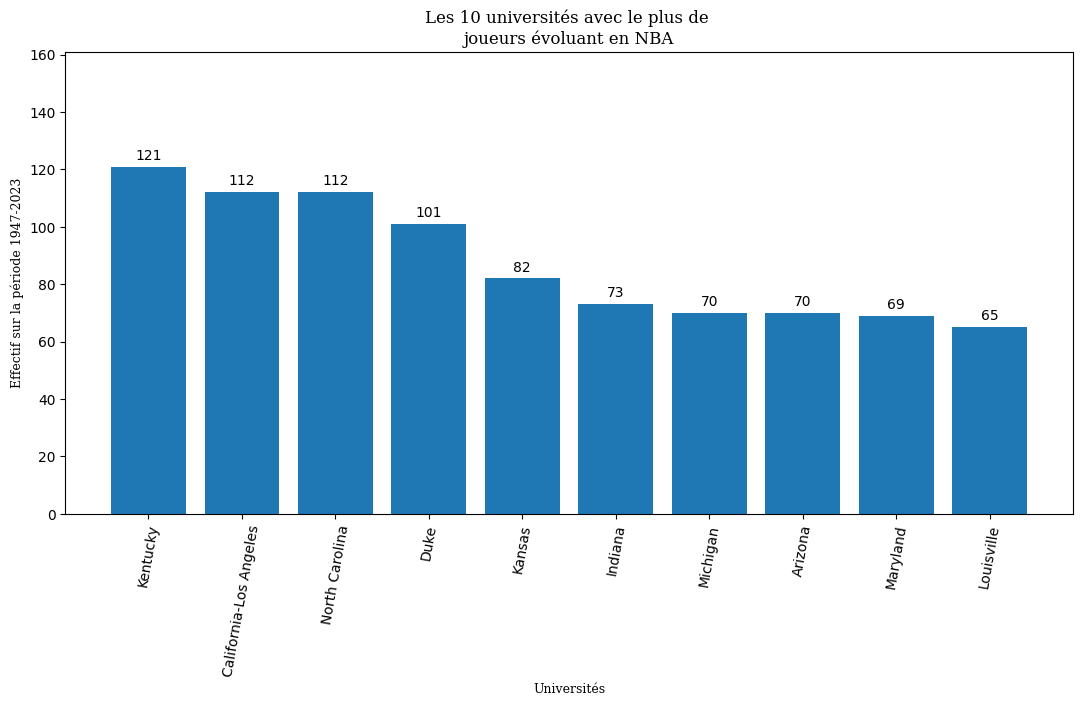

In [18]:
resultat, fig = reponses.prop_joueurs_en_nba_selon_universite_de_formation(top_N=10, periode='1947-2023', graph=True)

> Illustration de la table

In [19]:
resultat

,Université,Effectif
0,Kentucky,121
1,California-Los Angeles,112
2,North Carolina,112
3,Duke,101
4,Kansas,82
5,Indiana,73
6,Michigan,70
7,Arizona,70
8,Maryland,69
9,Louisville,65


In [20]:
# Modifions la taille de la figure existante (en pouces)
fig.set_size_inches(20, 14)  # largeur=14, hauteur=10

# Enregistrons dans une nouvelle figure en copiant
fig_modifie = copy.deepcopy(fig)

# exportation de la datavisualisation
exportfiles.export_to_png(
    img= fig_modifie,
    path=f'{figures_dir}/RQ_repQ2_universite.png'
)

True

#### 5. Distribution des pays d'origine les plus représentés parmi les joueurs NBA

A l'aide d'une méthode nous parvenons à repésenter à représentater cette distribution. En outre, la NBA n’est pas composée uniquement de joueurs américains : de nombreux pays contribuent également à enrichir cette ligue. On y retrouve notamment le **Canada, la France, la Serbie, l’Australie, la Croatie** et **l’Argentine** comme les six pays les plus représentés. Ces résultats témoignent de la montée en puissance du basketball à l’échelle internationale.

C:\Users\simal\Documents\SIMAL OUSSEYNOU\FRANCE\ENSAI Bruz\1ère année\Projet\Projet_traitement_donnees\PTD_G42\answers_class\reponses.py:862: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nb_joueurs_pays_preponderant["Pays"], rotation=45)


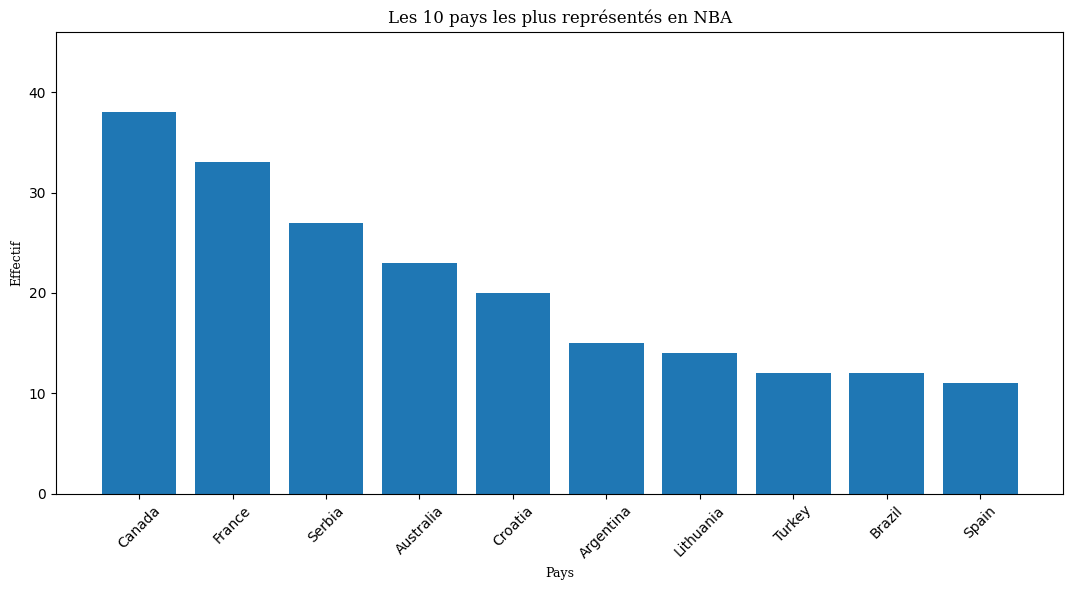

In [21]:
rep_q3, fig = reponses.top_N_nb_joueurs_par_pays(top=10, graph=True)

In [22]:
# exporter cette table ?
exportfiles.export_to_csv_format(
    rep_q3,
    f'{tables_dir}/RQ_repQ3.csv'
)

True

In [23]:
# Modifions la taille de la figure existante (en pouces)
fig.set_size_inches(14, 8)  # largeur=14, hauteur=8

# Enregistrons dans une nouvelle figure en copiant
fig_modifie = copy.deepcopy(fig)

# exportation de la datavisualisation
exportfiles.export_to_png(
    img= fig_modifie,
    path=f'{figures_dir}/RQ_repQ3_pays.png'
)

True

> **Réponse à la question précédente en python base - Karima JABRI**

In [24]:
# Récupértation de la table d'intérêt
common_player_without_usa = data["common_player_info"][data["common_player_info"]["country"] != 'USA']

> **Traitement**

In [25]:
liste = []
for line in common_player_without_usa.values:
    liste.append(list(line))

# liste_common_player_without_usa = common_player_without_usa.values.tolist() #avec pandas


# nombre de joueurs pour chaque pays mentionné
liste_common_player_without_usa = liste
nb_joueurs_pays_bis = {}
for joueurs in liste_common_player_without_usa :
    pays = joueurs[9]     # le pays est la neuvième colonne du tableau
    if pays not in nb_joueurs_pays_bis:
        nb_joueurs_pays_bis[pays] = 0
    nb_joueurs_pays_bis[pays] += 1


# proportions de joueurs pour chaque pays mentionné (en pourcentage)
prop_joueurs_pays_bis  = {}
for pays, nb_joueurs in nb_joueurs_pays_bis.items():
    prop_joueurs_pays_bis[pays] = nb_joueurs * 100 / len(liste_common_player_without_usa)

# on ne garde que les pays prépondérants
prop_joueur_pays_preponderant_bis = {pays : prop for pays, prop in prop_joueurs_pays_bis.items() if prop > 1}

print(prop_joueur_pays_preponderant_bis) ; print(nb_joueurs_pays_bis)

{'France': 8.229426433915211, 'Spain': 2.743142144638404, 'Nigeria': 2.743142144638404, 'South Sudan': 1.2468827930174564, 'Turkey': 2.9925187032418954, 'Canada': 9.476309226932669, 'United Kingdom': 1.4962593516209477, 'Australia': 5.7356608478802995, 'Lithuania': 3.491271820448878, 'Greece': 2.493765586034913, 'Brazil': 2.9925187032418954, 'Puerto Rico': 1.745635910224439, 'Croatia': 4.987531172069826, 'Russia': 2.2443890274314215, 'Latvia': 1.745635910224439, 'Georgia': 1.2468827930174564, 'Serbia': 6.733167082294265, 'Argentina': 3.7406483790523692, 'Germany': 2.493765586034913, 'Slovenia': 2.2443890274314215, 'Italy': 1.745635910224439, 'Dominican Republic': 1.2468827930174564, 'Senegal': 2.2443890274314215, 'Ukraine': 1.745635910224439, 'Montenegro': 1.2468827930174564, 'Bosnia and Herzegovina': 1.2468827930174564}
{'France': 33, 'Spain': 11, 'Nigeria': 11, 'New Zealand': 2, 'South Sudan': 5, 'Trinidad and Tobago': 1, 'Turkey': 12, 'Canada': 38, 'United Kingdom': 6, 'Australia': 

#### 6. L'évolution du nombre de match sur une période donnée

In [ ]:
def create_line_chart_nb_match(data: pd.DataFrame, year_range: tuple = None) -> matplotlib.figure.Figure:

In [ ]:
def create_line_chart_nb_match(data: pd.DataFrame, year_range: tuple = None) -> matplotlib.figure.Figure:
        """
        Retourne un graphique de l'évolution du nombre de rencontres NBA par saison,
        avec une option de filtrage par plage d'années.

        Cette méthode regroupe les données par saison, compte le nombre de rencontres,
        puis trace un graphique en ligne avec Matplotlib, filtré par année si spécifié.

        Parameters
        ----------
        self : object
            Instance de la classe contenant les attributs `self.data['game']` et
            `self.data['game_summary']`, qui doivent être des DataFrames pandas.

        year_range : tuple, optional
            Un tuple (année_début, année_fin) pour filtrer les données. Si non spécifié,
            toutes les données sont utilisées.

        Returns
        -------
        fig : matplotlib.figure.Figure
            L'objet figure représentant le graphique, sans affichage automatique.
        """
        # Si une plage d'années est donnée, filtrer les données
        filtered_data = copy.deepcopy(data)
        filtered_data["all_seasons_combined"] = filtered_data["season_id"].apply(
            lambda x: int(str(x)[-4:])
        )
        if year_range:
            start_year, end_year = year_range
            if start_year > end_year:
                raise ValueError(
                    "La date de début ne peut pas être après la date de fin"
                )

            # Filtrer les matchs en fonction des années
            filtered_data = filtered_data[
                (filtered_data["all_seasons_combined"] >= start_year)
                & (filtered_data["all_seasons_combined"] <= end_year)
            ]
        else:
            # Si aucune plage d'années n'est donnée, utiliser toutes les données
            pass

        # Agrégation des données pour compter les matchs par saison
        nb_match_par_saison = (
            filtered_data.groupby(["all_seasons_combined"])  # Groupement par saison
            .agg({"game_id": "count"})  # Comptage des matchs
            .reset_index()
        )

        # Renommage des colonnes pour plus de clarté
        nb_match_par_saison.rename(
            columns={"all_seasons_combined": "Saisons", "game_id": "Nombre de matchs"},
            inplace=True,
        )

        # Création du graphique
        fig, ax = plt.subplots(figsize=(10, 5))

        # Tracé du graphique en ligne
        ax.plot(
            nb_match_par_saison["Saisons"],  # Axe des X : saisons
            nb_match_par_saison["Nombre de matchs"],  # Axe des Y : nombre de matchs
            marker="o",  # Ajouter un marqueur pour chaque point
            color="limegreen",  # Couleur des points
        )

        # Titres et labels
        ax.set_title("Évolution du nombre de matchs par saison")
        ax.set_xlabel("Saison")
        ax.set_ylabel("Nombre de matchs")
        ax.grid(True)  # Affichage de la grille
        plt.xticks(rotation=45)  # Rotation des labels de l'axe X
        plt.tight_layout()  # Ajustement du layout pour éviter les chevauchements

        return fig

C:\Users\simal\AppData\Local\Temp\ipykernel_52416\1959984831.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  my_graph.show()


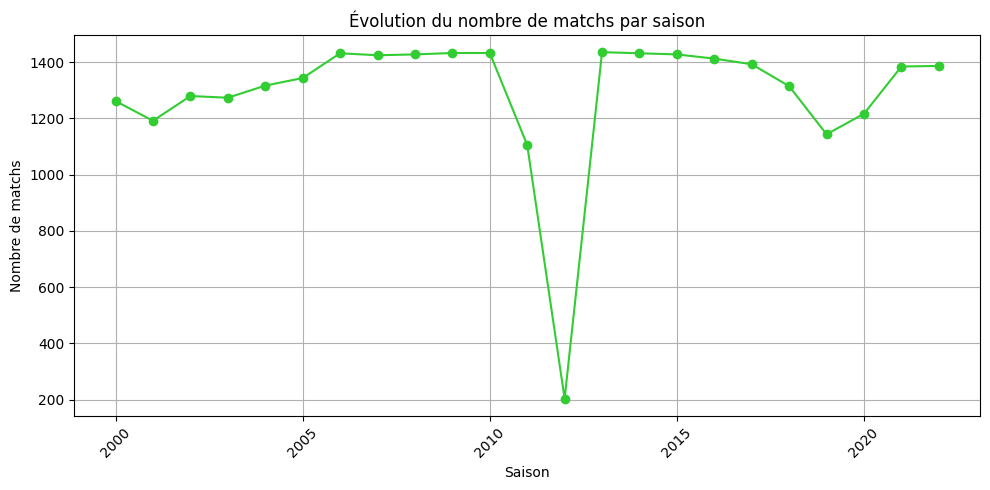

In [27]:
# utilisation de la fonction
data_to_use = data['game']
year_range = (2000, 2022)
my_graph = create_line_chart_nb_match(data=data_to_use, year_range=year_range)

# pour exporter
exportfiles.export_to_png(
    img= my_graph,
    path=f'{figures_dir}/RQ_repQ5_evo_rencontre.png'
)

# affichage du graphique
my_graph.show()


#### 6. Reponse à la question précédente en python base - **Djamal TOE**

On suppose que la table concernée aie déjà été chargée et que je dois effectué les opérations nécessaires manuellement pour obtenir la table résultante pour le graphique. La foncton faite avec pandas (`create_line_chart_nb_match`) compte le nombre de jeux par année (saison). Chaque jeu ayant un id (`game_id`) unique, pour ecrire ma fonction à la main il suffit juste de compter le nombre d'occurences de chaque année comprise dans la page d'années (`year_range`) entrée par l'utilisateur. Si je devais le faire en `pandas`, cela équuivaudrait à un `groupby(year)` et un `count(gameid)` (ce que je fais dans la fonction ci-avant), mais équivaut également à `groupby(year)` et à un comptage du nombre de ligne de la nouvelle table rétourner.

Pour ce faire j'écris une fonction qui tronquer les éléments d'une liste d'entier à partir du dernier indexe en partant de la fin. Ensuite j'écris une fonction qui cmopte le nombre d'occurence des éléments d'une liste et retourne un dictionnaire ou les clés sont en fait les valeurs distincts des éléments de la liste et les valeurs sont les nombres d'occurrence de chaque valeurs distinctes. J'utilise enfin ces fonction dans ma fonction finale qui me retourne un dictionnaire d'année (clé) et de nombre de match (valeur)

In [28]:
def tronque_list(l: list) -> list:
    """
    Extrait les 4 derniers chiffres de chaque élément d'une liste et les convertit en entiers.

    Cette fonction prend une liste de 5 éléments (de n'importe quel type convertible en chaîne de caractères),
    extrait les 4 derniers caractères de chaque élément une fois converti en chaîne, puis les convertit en entiers.

    Paramètres
    ----------
    l : list
        Liste de 5 éléments. Chaque élément doit pouvoir être converti en chaîne de caractères
        d'au moins 4 caractères.

    Retour
    ------
    list
        Une nouvelle liste contenant les 4 derniers chiffres de chaque élément, convertis en entiers.

    Exceptions
    ----------
    TypeError :
        Si l'entrée n'est pas une liste.
    ValueError :
        Si la liste ne contient pas exactement 5 éléments.

    Exemple
    -------
    >>> convert_list_elt_to_str(["S2020", "S2021", "S2022", "S2023", "S2024"])
    [2020, 2021, 2022, 2023, 2024]
    """

    if not isinstance(l, list):
        raise TypeError('l doit être une liste')
    if any(len(str(elt)) != 5 for elt in l):
        raise ValueError('La liste doit avoir 5 éléments')
    if (
        any(not isinstance(elt, int) for elt in l) or
        any(not str(elt).isdigit() for elt in l)
    ):
        raise TypeError(
            'Les éléments de la liste doivent être de type'
            ' int ou des chaines de carractères composées uniquement de chiffres'
        )
    list_result = copy.deepcopy(l)
    list_result = [int(str(elt)[-4:]) for elt in l]
    return list_result

In [29]:
def count_nb_occurrences_in_a_list(l: list) -> dict:
    """
    Compte le nombre d’occurrences de chaque élément dans une liste.

    Parameters
    ----------
    l : list
        La liste dont on veut compter les occurrences.

    Returns
    -------
    dict
        Dictionnaire où chaque clé est un élément unique de la liste
        et chaque valeur est le nombre de fois que cet élément apparaît.

    Examples
    --------
    >>> count_nb_occurrences_in_a_list([1, 2, 2, 3, 1])
    {1: 2, 2: 2, 3: 1}

    >>> count_nb_occurrences_in_a_list(['a', 'b', 'a', 'c'])
    {'a': 2, 'b': 1, 'c': 1}
    """

    if not isinstance(l, list):
        raise TypeError('l doit être une liste')
    if not l:
        raise ValueError("La liste ne peut pas être vide")

    counts = {}
    for elt in l:
        counts[elt] = counts.get(elt, 0) + 1
    return counts


In [30]:
def get_nb_matches_per_season_plain(data, year_range=None) -> dict:
    """
    Retourne le nombre de rencontres NBA par saison sans utiliser pandas,
    avec option de filtrage par plage d'années.

    Parameters
    ----------
    data : iterable of dict
        Chaque élément doit contenir au moins les clés 'season_id' et 'game_id'.
    year_range : tuple of two ints, optional
        (année_début, année_fin). Si fourni, seules les saisons dans cet intervalle
        sont conservées.

    Returns
    -------
    counts : dict
        Dictionnaire ou la clé c'est la saison (annee) et
        la valeur c'est le nombre de matchs disputéau cours de celle-ci
    """

    if not isinstance(data, pd.DataFrame):
        raise TypeError("La table doit être un objet pandas")
    if data is None:
        raise ValueError('La table ne peut pas être un objet nul')
    if year_range is None:
        raise ValueError("La plage d'année est incorrecte")
    if not isinstance(year_range[0], int) or not isinstance(year_range[1], int):
        raise TypeError("Chaque année doit être un entier")
    if year_range[1] < year_range[0]:
        raise ValueError("La date de debut ne peut pas être après la date de fin")
    if not isinstance(year_range, tuple):
        raise TypeError("La plage d'année doit être un tuple")


    counts = {}
    for column, row in data.items():
        # extraire l'année de la saison
        if column == 'season_id':
            row = row.tolist()
            years = tronque_list(row)
            filtered_years = []
            for year in years:
                if year <= year_range[1] and year >= year_range[0]:
                    filtered_years.append(year)

    # count le nombre d'occurence des années
    counts = count_nb_occurrences_in_a_list(filtered_years)

    return counts


In [31]:
data_to_use = data['game']
year_range = (2000, 2022)
result = get_nb_matches_per_season_plain(data_to_use, year_range)
result

{2000: 1261,
 2001: 1191,
 2002: 1279,
 2003: 1273,
 2004: 1316,
 2005: 1343,
 2006: 1431,
 2007: 1424,
 2008: 1427,
 2009: 1432,
 2010: 1432,
 2011: 1105,
 2012: 203,
 2013: 1435,
 2014: 1431,
 2015: 1427,
 2016: 1412,
 2017: 1392,
 2018: 1314,
 2019: 1143,
 2020: 1216,
 2021: 1384,
 2022: 1386}

On retrouve donc les mêmes valeurs que sur le graphique en ammont. Néanmoins je le tracerai avec `matplotlib`.

C:\Users\simal\AppData\Local\Temp\ipykernel_52416\4116018267.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


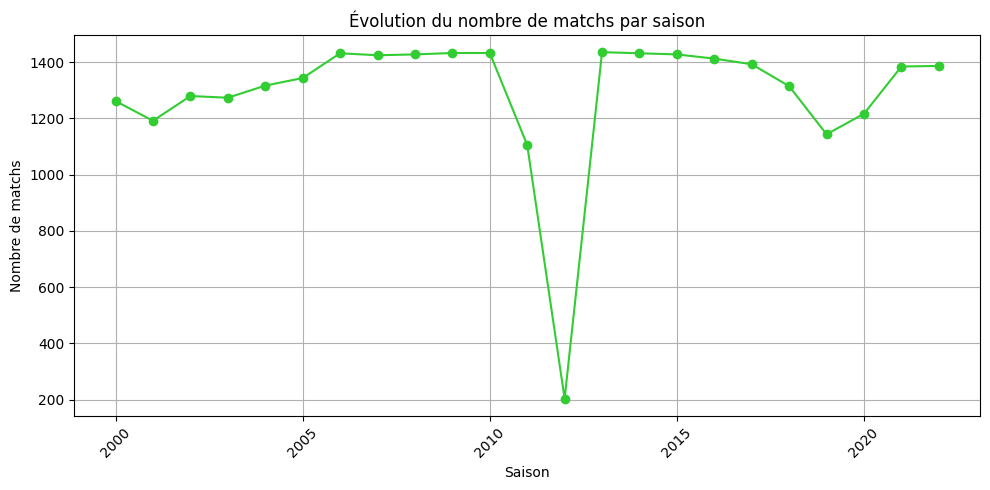

In [32]:
season = np.asarray(list(result.keys()))
nb_games = np.asarray(list(result.values()))

fig, ax = plt.subplots(figsize=(10, 5))

        # Tracé du graphique en ligne
ax.plot(
    season,  # Axe des X : saisons
    nb_games,  # Axe des Y : nombre de matchs
    marker="o",  # Ajouter un marqueur pour chaque point
    color="limegreen",  # Couleur des points
)

# Titres et labels
ax.set_title("Évolution du nombre de matchs par saison")
ax.set_xlabel("Saison")
ax.set_ylabel("Nombre de matchs")
ax.grid(True)  # Affichage de la grille
plt.xticks(rotation=45)  # Rotation des labels de l'axe X
plt.tight_layout()

fig.show()


#### 7. Les numéros 1 de la draft lors des 5 dernières saisons

Dans cette section, nous présentons un tableau récapitulatif des **numéros 1 de la Draft NBA au cours des cinq dernières saisons**, ainsi que les **équipes** qui les ont sélectionnés. Ces données permettent d’observer l’origine des joueurs les plus convoités à l’entrée dans la ligue. Notre méthode de classe offre la possibilité de décider du nombre d'année en arrière que l'on veut considérer.

In [33]:
rep_q4 = reponses.premiers_choix_draft_N_derniere_saison(N_saison=5)
rep_q4

,Identifiant,Saison,Nom,Equipe,Pays
69,1629627,2019,Zion Williamson,New Orleans,USA
70,1630162,2020,Anthony Edwards,Minnesota,USA
71,1630595,2021,Cade Cunningham,Detroit,USA
72,1631094,2022,Paolo Banchero,Orlando,USA
73,1641705,2023,Victor Wembanyama,San Antonio,France


In [34]:
# exporter cette table ?
exportfiles.export_to_csv_format(
    rep_q4,
    f'{tables_dir}/RQ_repQ4.csv'
)

True

> **Réponse à la question précedente en python base - Denis THAYANANTHARAJAH**

In [35]:
def premiers_choix_draft_N_derniere_saison(data: dict, N_saison: int = 3) -> list:
    """
    Retourne les informations sur les premiers choix de la Draft NBA
    pour les N dernières saisons (par défaut 3), en utilisant Python pur.

    Paramètres
    ----------
    N_saison : int
        Le nombre de saisons à prendre en compte à partir de 2023 vers le passé.
    data : dict
        Le dictionnaire contenant les données, avec une clé 'draft_history' (list of dicts).

    Returns
    -------
    list
        Liste de dictionnaires contenant les informations : identifiant, saison,
        nom, ville de l'équipe et pays d'origine.
    """

    if not isinstance(N_saison, int) or N_saison <= 0:
        raise ValueError("L'argument N_saison doit être un entier strictement positif.")

    # Charger les données nécessaires et les convertir en listes de dictionnaires
    draft_history = data["draft_history"].to_dict('records')  # Conversion de DataFrame en liste de dictionnaires
    players_info = data["common_player_info"].to_dict('records')  # Conversion de DataFrame en liste de dictionnaires

    # Filtrer les premiers choix (overall_pick == 1 et draft_type == "Draft")
    premiers = []
    for joueur in draft_history:
        if joueur["overall_pick"] == 1 and joueur["draft_type"] == "Draft":
            premiers.append(joueur)

    # Ne garder que les saisons récentes
    annee_min = 2023 - N_saison + 1
    premiers = [j for j in premiers if j["season"] >= annee_min]

    # Résultat : Ajouter les informations de pays pour chaque joueur
    resultat = []
    for joueur in premiers:
        pays = None
        # Trouver le pays du joueur
        for info in players_info:
            if info["person_id"] == joueur["person_id"]:
                pays = info.get("country", None)
                break

        # Cas spécial pour Victor Wembanyama (car le jeu de données considère qu'il n'a pas de pays)
        if joueur["person_id"] == 1641705:
            pays = "France"

        # Ajouter l'information du joueur dans le résultat
        resultat.append({
            "Identifiant": joueur["person_id"],
            "Saison": joueur["season"],
            "Nom": joueur["player_name"],
            "Equipe": joueur["team_city"],
            "Pays": pays
        })

    return resultat


In [36]:
# Test de la fonction
resultat = premiers_choix_draft_N_derniere_saison(data, N_saison=7)
print(resultat)

[{'Identifiant': 1628365, 'Saison': 2017, 'Nom': 'Markelle Fultz', 'Equipe': 'Philadelphia', 'Pays': 'USA'}, {'Identifiant': 1629028, 'Saison': 2018, 'Nom': 'Deandre Ayton', 'Equipe': 'Phoenix', 'Pays': 'Bahamas'}, {'Identifiant': 1629627, 'Saison': 2019, 'Nom': 'Zion Williamson', 'Equipe': 'New Orleans', 'Pays': 'USA'}, {'Identifiant': 1630162, 'Saison': 2020, 'Nom': 'Anthony Edwards', 'Equipe': 'Minnesota', 'Pays': 'USA'}, {'Identifiant': 1630595, 'Saison': 2021, 'Nom': 'Cade Cunningham', 'Equipe': 'Detroit', 'Pays': 'USA'}, {'Identifiant': 1631094, 'Saison': 2022, 'Nom': 'Paolo Banchero', 'Equipe': 'Orlando', 'Pays': 'USA'}, {'Identifiant': 1641705, 'Saison': 2023, 'Nom': 'Victor Wembanyama', 'Equipe': 'San Antonio', 'Pays': 'France'}]


#### 8. Les équipes ayant obtenu le plus de victoires et de défaites durant les 5 dernières saisons régulières

En nous servant toujours d'une méthode de notre classe `Reponse`, nous pouvons apporter une réponse à cette intérogation. La méthode permet à l'utilisateur de définir : 

* la période
* le type de saison à laquelle il souhaite s'intéresser (Saison régulière, playoffs, etc.)
* le nombre d'année antérieure qu'il souhaite considérer

Aussi grâce à cette méthode, on peut afficher soit l'équipe avec le plus de victoires sur la saison, soit celle avec le plus de défaites.

> Les équipes avec le plus de victoires sur chaque saison

In [37]:
rep_q5_1 = reponses.nombre_victoires_ou_defaites_equipe_les_N_dernieres_saisons(debut_periode=2018,
                                                                     fin_periode=2023,
                                                                     season_type="Regular Season")

> Les équipes avec le plus de défaites sur chaque saison

In [38]:
# exporter cette table ?
exportfiles.export_to_csv_format(
    rep_q5_1,
    f'{tables_dir}/RQ_repQ5_victoire.csv'
)

True

In [39]:
rep_q5_2 = reponses.nombre_victoires_ou_defaites_equipe_les_N_dernieres_saisons(debut_periode=2018,
                                                                     fin_periode=2023,
                                                                     season_type="Regular Season",
                                                                     defaite=True)

rep_q5_2

,Saison,Equipes,Nombre de défaites
0,2018-2019,New York Knicks,65
1,2019-2020,Golden State Warriors,50
2,2020-2021,Houston Rockets,55
3,2021-2022,Houston Rockets,62
4,2022-2023,Detroit Pistons,65


In [40]:
# exporter cette table ?
exportfiles.export_to_csv_format(
    rep_q5_2,
    f'{tables_dir}/RQ_repQ5_defaite.csv'
)

True

#### 9. Les champions NBA au cours des 8 dernières saisons

Nous avions, grâce à une autre méthode de classe, réaliser ce traitement. Cette méthode offre la possibilité à l'utilisateur d'obtenir le vainceur du titre NBA lors des différrentes saisons d'une période qu'il précisera en passant à la méthode l'année de début (`debut_periode`) et l'année de fin de la période (`fin_periode`). 

> Le vaiceur de la saison 2022-2023

In [41]:
rep_q6_1 = reponses.vainqueur_titre_NBA_saisons(debut_periode=2022,
                                     fin_periode=2023)
rep_q6_1

,Saison,Equipes
0,2022-2023,Denver Nuggets


> Vainceur lors des 8 dernières saisons

In [42]:
rep_q6_2= reponses.vainqueur_titre_NBA_saisons(debut_periode=1961, fin_periode=1980)
rep_q6_2

,Saison,Equipes
0,1961-1962,Boston Celtics
1,1962-1963,Boston Celtics
2,1963-1964,Boston Celtics
3,1964-1965,Boston Celtics
4,1965-1966,Boston Celtics
5,1966-1967,Philadelphia 76ers
6,1967-1968,Boston Celtics
7,1968-1969,Boston Celtics
8,1969-1970,New York Knicks
9,1970-1971,Milwaukee Bucks


In [43]:
# exporter cette table ?
exportfiles.export_to_csv_format(
    rep_q6_2,
    f'{tables_dir}/RQ_repQ6_vainqueur.csv'
)

True

#### 10. Les équipes ayant remporté le titre NBA deux années consécutives

On c'est aussi intéresser aux équipes étant parvenu à maintenir leur titre de champion un certains nombre fois. Ainsi, notre méthode de classe nous permet d'avoir cette information. On peut aussi définir une période d'étude et définir le nombre d'années consécutives qu'une équipe parvienne à m'intenir son titre de champion NBA.

In [44]:
reponses.equipe_qui_remporte_N_fois_daffile_le_titre(N = 2, debut_periode=1946, fin_periode=2023)

['Los Angeles Lakers',
 'Philadelphia 76ers',
 'Boston Celtics',
 'Detroit Pistons',
 'Chicago Bulls',
 'Houston Rockets',
 'Miami Heat',
 'Golden State Warriors']

> Boston Celtics est la seul équipe de l'histoire à avoir réaliser un exploit de 8 titres consécutifs.

In [45]:
reponses.equipe_qui_remporte_N_fois_daffile_le_titre(N = 2, debut_periode=1946, fin_periode=2023)

['Los Angeles Lakers',
 'Philadelphia 76ers',
 'Boston Celtics',
 'Detroit Pistons',
 'Chicago Bulls',
 'Houston Rockets',
 'Miami Heat',
 'Golden State Warriors']